[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/kuvychko/complex_analysis/main?labpath=Complex_Mappings.ipynb)

In [11]:
from dataclasses import dataclass
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('seaborn-whitegrid')

# Select one of matplotlib GUIs
# to run in as a local notebook:
# %matplotlib notebook

# to run in Binder:
%matplotlib widget

## Defining a rectangular Grid

To define a Grid, use a 4-tuple of complex numbers corresponding to the corners of the quadrilateral listed counter-clockwise (in positive direction). n and m integers define the number of grid divisions for two grid dimensions.

In [12]:
@dataclass
class Line:
    vertex0: complex
    vertex1: complex

class Grid:
    # Rectangular grid
    def __init__(
        self,
        vertices: Tuple[complex, complex, complex, complex],
        n: int,
        m: int,
    ):
        a, b, c, d = vertices
        # generate a list of Lines
        self.lines = []
        self.lines += [Line(i, j) for (i, j) in zip(np.linspace(a, b, n), np.linspace(d, c, n))]
        self.lines += [Line(i, j) for (i, j) in zip(np.linspace(b, c, m), np.linspace(a, d, m))]
    
    def rasterize(self, n: int) ->List:
        output = []
        for line in self.lines:
            x = np.linspace(line.vertex0, line.vertex1, n)
            output.append(x)
        return output

In [13]:
centered_4by4 = (-2-2j, -2+2j, 2+2j, 2-2j)
grid_a = Grid(centered_4by4, 5, 5)

centered_2by2 = (i/2 for i in centered_4by4)
grid_b = Grid(centered_2by2, 5,5)

offcenter_2by2 = (i/2+1 for i in centered_4by4)
grid_c = Grid(offcenter_2by2, 5,5)

## Defining Orbit
To define an Orbit, provide start and end parameter values, and orbit function (complex-valued).

To learn more about animation with matplotlib, see https://matplotlib.org/stable/api/animation_api.html.
Code below uses closures to connect matplotlib artists with the plotting function.

In [14]:
class Orbit(object):
    def __init__(
        self,
        start,
        end,
        func,
    ):
        self.start = start
        self.end = end
        self.func = func
    
    def rasterize(self, n):
        x = np.linspace(self.start, self.end, n)
        return self.func(x)
    
    def plot(self, func, frames=50, interval=200, grid=None, file=None, figsize=(8,5)):
        preimage = self.rasterize(frames)
        image = func(preimage)
        
        if grid is not None:
            grid = grid.rasterize(frames)
            all_points = np.concatenate([preimage, *grid])
        else:
            all_points = preimage
            
        # calculating plot limits
        def opt_limits(y):
            def calc_limits(x, margin=0.05):
                x_min = x.min()
                x_max = x.max()
                x_range = x_max - x_min
                x_min -= margin*x_range
                x_max += margin*x_range
                return x_min, x_max
            x_min, x_max = calc_limits(np.real(y))
            y_min, y_max = calc_limits(np.imag(y))
            return min([x_min, y_min]), max([x_max, y_max])
        
        fig, ax = plt.subplots(1, 2, figsize=figsize)
        ax[0].set_aspect('equal')
        ax[1].set_aspect('equal')
        
        def animate(i):
            ax[0].clear()
            ax[1].clear()
            
            # update Point location
            ax[0].scatter(np.real(preimage[i]), np.imag(preimage[i]), c='blue', marker='o')
            ax[1].scatter(np.real(image[i]), np.imag(image[i]), c='blue', marker='o')
            
            # update Curve
            ax[0].plot(np.real(preimage[:i+1]), np.imag(preimage[:i+1]), c='black', marker=None)
            ax[1].plot(np.real(image[:i+1]), np.imag(image[:i+1]), c='black', marker=None)
            
            # update Grid
            if grid:
                for line in grid:
                    ax[0].plot(np.real(line), np.imag(line), marker=None, c='gray')
                    ax[1].plot(np.real(func(line)), np.imag(func(line)), marker=None, c='gray')

            # adding labels and setting limits
            ax[0].set_title('Preimage')
            ax[1].set_title('Image')
            
            preim_min, preim_max = opt_limits(all_points)
            ax[0].set_xlim(preim_min, preim_max)
            ax[0].set_ylim(preim_min, preim_max)
            im_min, im_max = opt_limits(func(all_points))
            ax[1].set_xlim(im_min, im_max)
            ax[1].set_ylim(im_min, im_max)
    
        anim = animation.FuncAnimation(fig, animate, frames=frames, interval=interval, blit=True)
        if file:
            anim.save(file)
        plt.show()
        return anim

## Examples

In [15]:
unit_circle = Orbit(0, 2*np.pi, lambda x: np.exp(1j*x))
large_circle = Orbit(0, 2*np.pi, lambda x: 2*np.exp(1j*x))
translated_circle = Orbit(0, 2*np.pi, lambda x: np.exp(1j*x)+1.5+1.5j)
spiral = Orbit(0, 6*np.pi, lambda x: np.exp((0.05+1j)*x))

Exponent:

<IPython.core.display.Javascript object>


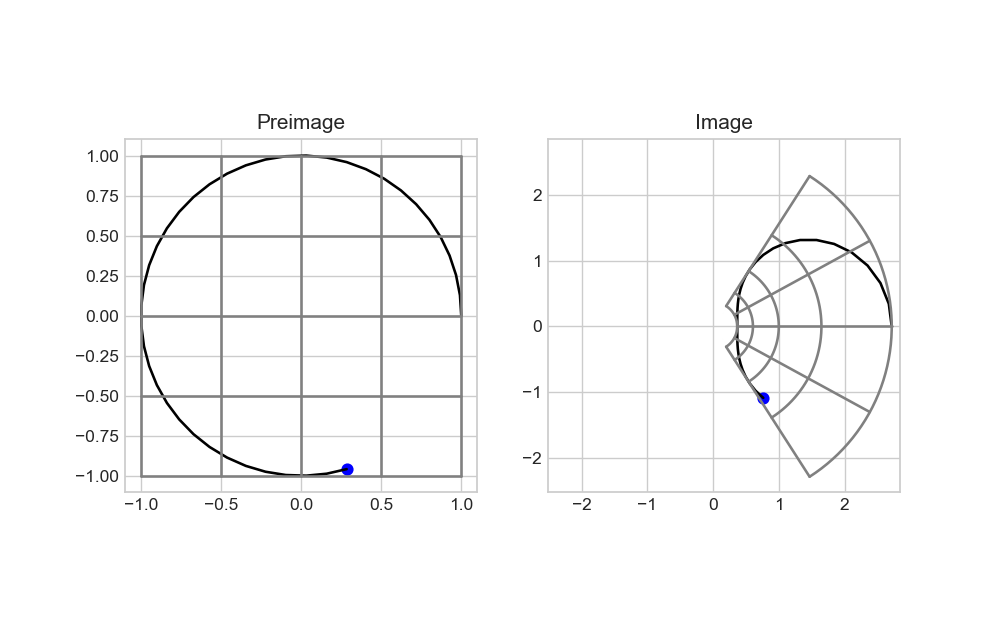

In [16]:
_ = unit_circle.plot(func = lambda x: np.exp(x), frames=50,  grid=grid_b, interval=20)

Second-order polynomial:

<IPython.core.display.Javascript object>


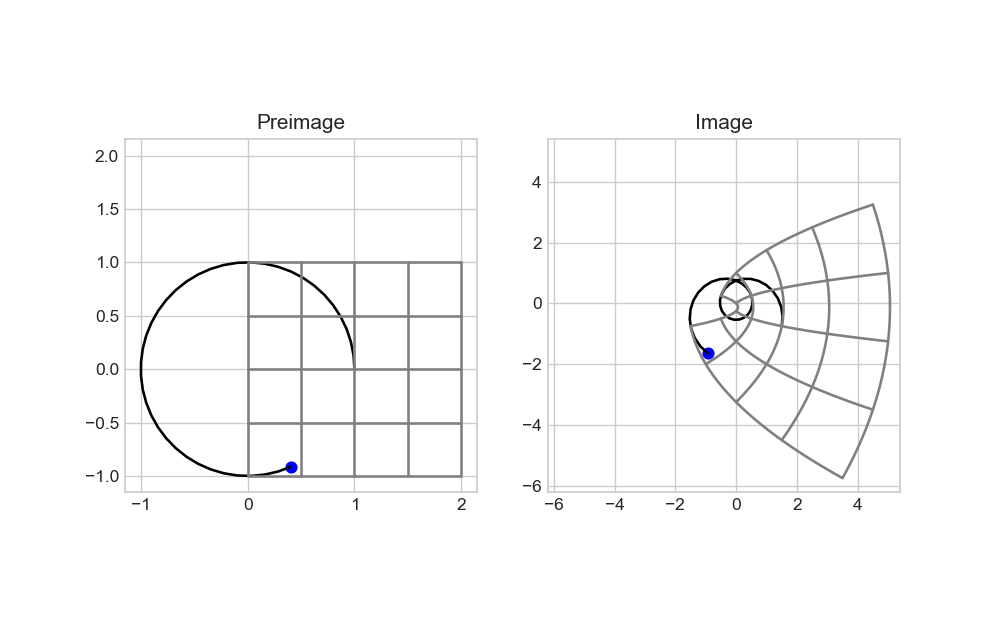

In [22]:
_ = unit_circle.plot(func = lambda x: (x+0.5)*(x-0.5j), frames=50,  grid=grid_c, interval=50)

<IPython.core.display.Javascript object>


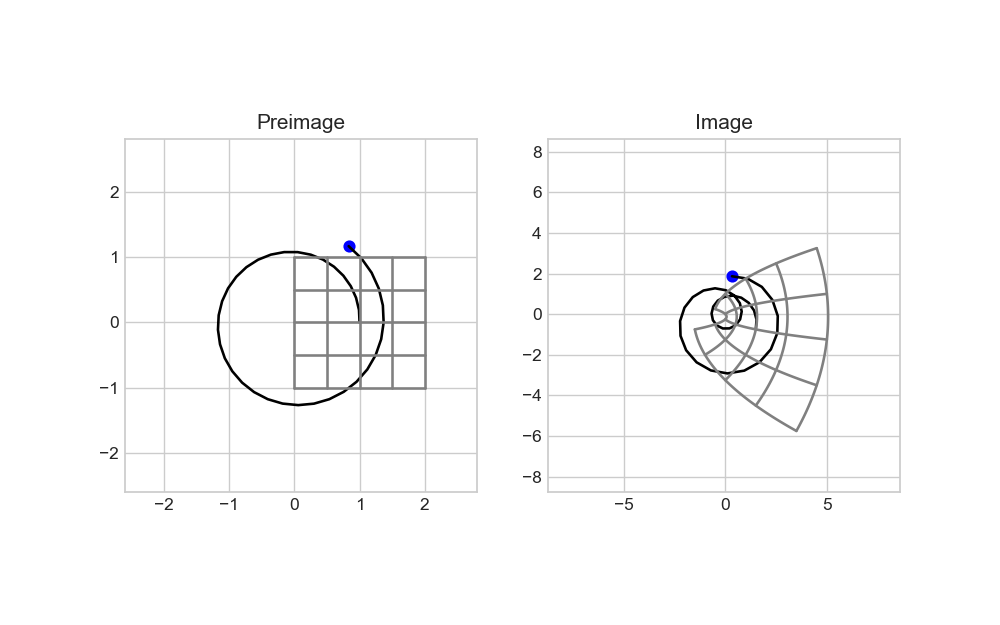

MovieWriter ffmpeg unavailable; using Pillow instead.


In [19]:
_ = spiral.plot(func = lambda x: (x+0.5)*(x-0.5j), frames=100,  grid=grid_c, interval=20, file='polynomial3.gif')

Sin:

<IPython.core.display.Javascript object>


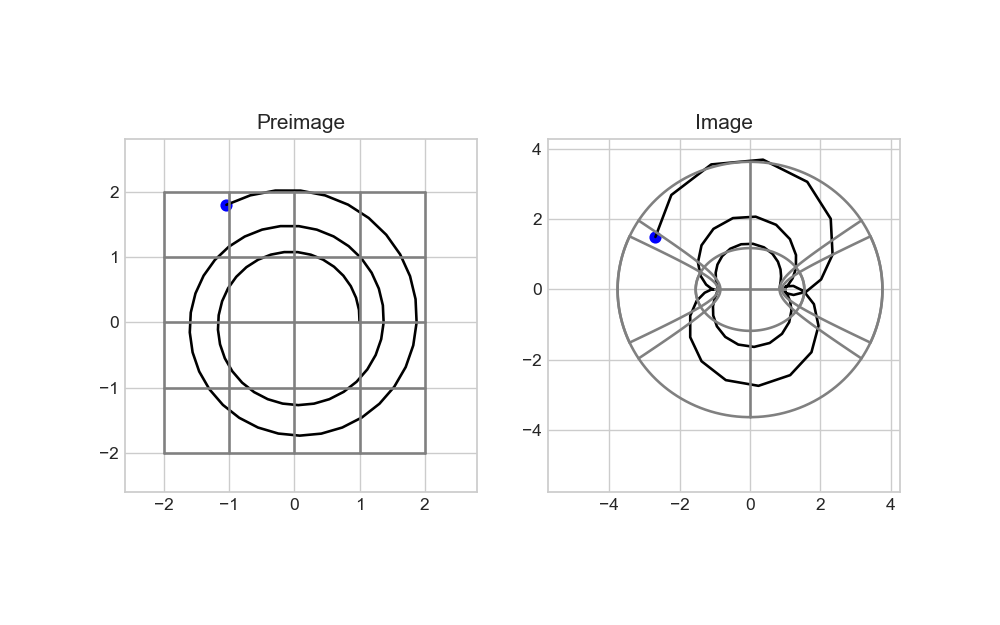

In [21]:
_ = spiral.plot(func = lambda x: np.sin(x), frames=100,  grid=grid_a, interval=20)